## Installation

In [ ]:
%pip install cartopy -q

## Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
sns.set()

from os import listdir
from os.path import isfile, join

# Processing the dataset

In [3]:
mypath = 'data'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in onlyfiles:
    print(file)

circuits.csv
status.csv
lap_times.csv
sprint_results.csv
drivers.csv
races.csv
constructors.csv
constructor_standings.csv
qualifying.csv
driver_standings.csv
constructor_results.csv
pit_stops.csv
seasons.csv
results.csv


## Creating dataframes from each file

In [ ]:
drivers = pd.read_csv('data/drivers.csv')
driver_result = pd.read_csv('data/results.csv')
races = pd.read_csv("data/races.csv")

races_date = races[['date', 'circuitId', 'raceId']]
races_date['date'] = pd.to_datetime(races_date['date'])
races_date = races_date[(races_date['date'].dt.year!=2023) & (races_date['date'].dt.year!=2022)]

circuits = pd.read_csv('data/circuits.csv')
driver_standings = pd.read_csv('data/driver_standings.csv')
laptimes = pd.read_csv('data/lap_times.csv')
laptimes = laptimes[['raceId','driverId','lap','milliseconds']]

qualifying = pd.read_csv('data/qualifying.csv')
qualifying = qualifying[['driverId','position']]

In [16]:
df1 = pd.merge(driver_result, races, on ='raceId')
df_race= pd.merge(df1, drivers, on = 'driverId')
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,2023-07-29,14:30:00,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,2023-07-29,14:30:00,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,2023-07-29,14:30:00,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,2023-07-29,14:30:00,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [17]:
posterior_data = ['laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x', 'time_y', 'positionOrder']
df_race = df_race.drop(columns=posterior_data)
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,points,rank,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,10.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,8.0,3,...,\N,\N,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,6.0,5,...,\N,\N,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,5.0,7,...,\N,\N,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,4.0,1,...,\N,\N,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,0.0,15,...,2023-07-29,14:30:00,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,0.0,9,...,2023-07-29,14:30:00,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,0.0,4,...,2023-07-29,14:30:00,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,0.0,19,...,2023-07-29,14:30:00,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [18]:
df_race = df_race.drop(columns=['position',  'positionText', 'number_x', 'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'nationality', 'url_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time', 'name'])
df_race

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07
1,2,18,2,2,5,8.0,3,2008,1,1,2008-03-16,HEI,Nick,Heidfeld,1977-05-10
2,3,18,3,3,7,6.0,5,2008,1,1,2008-03-16,ROS,Nico,Rosberg,1985-06-27
3,4,18,4,4,11,5.0,7,2008,1,1,2008-03-16,ALO,Fernando,Alonso,1981-07-29
4,5,18,5,1,3,4.0,1,2008,1,1,2008-03-16,KOV,Heikki,Kovalainen,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,0.0,15,2023,12,13,2023-07-30,RIC,Daniel,Ricciardo,1989-07-01
26076,26082,1110,858,3,18,0.0,9,2023,12,13,2023-07-30,SAR,Logan,Sargeant,2000-12-31
26077,26083,1110,807,210,0,0.0,4,2023,12,13,2023-07-30,HUL,Nico,Hülkenberg,1987-08-19
26078,26084,1110,832,6,4,0.0,19,2023,12,13,2023-07-30,SAI,Carlos,Sainz,1994-09-01


In [19]:
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,39.0
1,2,18,2,2,5,8.0,3,2008,1,1,2008-03-16,HEI,Nick,Heidfeld,1977-05-10,47.0
2,3,18,3,3,7,6.0,5,2008,1,1,2008-03-16,ROS,Nico,Rosberg,1985-06-27,39.0
3,4,18,4,4,11,5.0,7,2008,1,1,2008-03-16,ALO,Fernando,Alonso,1981-07-29,43.0
4,5,18,5,1,3,4.0,1,2008,1,1,2008-03-16,KOV,Heikki,Kovalainen,1981-10-19,42.0


In [20]:

df_driver = drivers.copy()
df_driver['totalWins'] = 0
race_dates = races[['raceId','date']]

driver_standings = driver_standings.merge(race_dates[['raceId', 'date']], how='left', on='raceId')
driver_standings['date'] = pd.to_datetime(driver_standings['date'])

driver_standings['year'] = driver_standings['date'].dt.year

num_races_per_driver = driver_standings.groupby('driverId')['raceId'].nunique()
num_races_per_driver_df = num_races_per_driver.reset_index()
num_races_per_driver_df = num_races_per_driver_df.rename(columns={'raceId': 'totalRaces'})

for index, row in df_driver.iterrows():
    driverId = row['driverId']
    driver_standings_csv_driverId = driver_standings[driver_standings['driverId'] == driverId]
    latest_day_in_year = driver_standings_csv_driverId.groupby(driver_standings_csv_driverId['date'].dt.year)['date'].max()
    filtered_dataframe = driver_standings_csv_driverId.loc[driver_standings_csv_driverId['date'].isin(latest_day_in_year)]

    total_wins = filtered_dataframe['wins'].sum()
    index = df_driver.index[df_driver['driverId'] == driverId].tolist()[0]
    df_driver.at[index, 'totalWins'] = total_wins

df_driver = df_driver.merge(num_races_per_driver_df, how='left', on='driverId')

df_driver['winRate'] = df_driver['totalWins'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalWins'], axis=1)
df_driver['dob'] = pd.to_datetime(df_driver['dob'])
df_driver['age'] = 2023 - df_driver['dob'].dt.year

df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,322.0,0.319876,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,372.0,0.086022,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42


In [21]:
idx = laptimes.groupby('raceId')['milliseconds'].idxmin()
df_min_milliseconds = laptimes.loc[idx]
df_min_milliseconds.sort_values('raceId', inplace=True)

counts = pd.DataFrame(df_min_milliseconds['driverId'].value_counts())
counts.columns = ['totalFastestLaps']
counts['driverId'] = counts.index
counts.reset_index(drop=True, inplace=True)
df_driver = df_driver.merge(counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)
df_driver['fastestLapRate'] = df_driver['totalFastestLaps'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalFastestLaps'], axis=1)
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,322.0,0.319876,38,0.192547
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,372.0,0.086022,42,0.061828
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018


In [22]:
position_1_counts = qualifying[qualifying['position'] == 1].groupby('driverId')['position'].count().reset_index()
position_1_counts = position_1_counts.rename(columns={'position': 'position_1_count'})
df_driver = df_driver.merge(position_1_counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)
df_driver['qualifyingWinRate'] = df_driver['position_1_count'] / df_driver['totalRaces']
df_driver = df_driver.drop(['position_1_count'], axis=1)
df_driver.fillna(0, inplace=True)
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,322.0,0.319876,38,0.192547,0.332298
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309,0.005155
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087,0.145631
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,372.0,0.086022,42,0.061828,0.061828
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018,0.009009


In [23]:
print("Number of data point for race dataframe: " + str(df_race.shape[0]))
print("Number of data point for driver dataframe: " + str(df_driver.shape[0]))

Number of data point for race dataframe: 26080
Number of data point for driver dataframe: 857


In [24]:
print("Data frame race information")
df_race.info()

print('\n\n')
print("Data frame driver information")
df_driver.info()

Data frame race information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       26080 non-null  int64         
 1   raceId         26080 non-null  int64         
 2   driverId       26080 non-null  int64         
 3   constructorId  26080 non-null  int64         
 4   grid           26080 non-null  int64         
 5   points         26080 non-null  float64       
 6   rank           26080 non-null  object        
 7   year           26080 non-null  int64         
 8   round          26080 non-null  int64         
 9   circuitId      26080 non-null  int64         
 10  date           26080 non-null  datetime64[ns]
 11  code           26080 non-null  object        
 12  forename       26080 non-null  object        
 13  surname        26080 non-null  object        
 14  dob            26080 non-null  datetime64[

/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

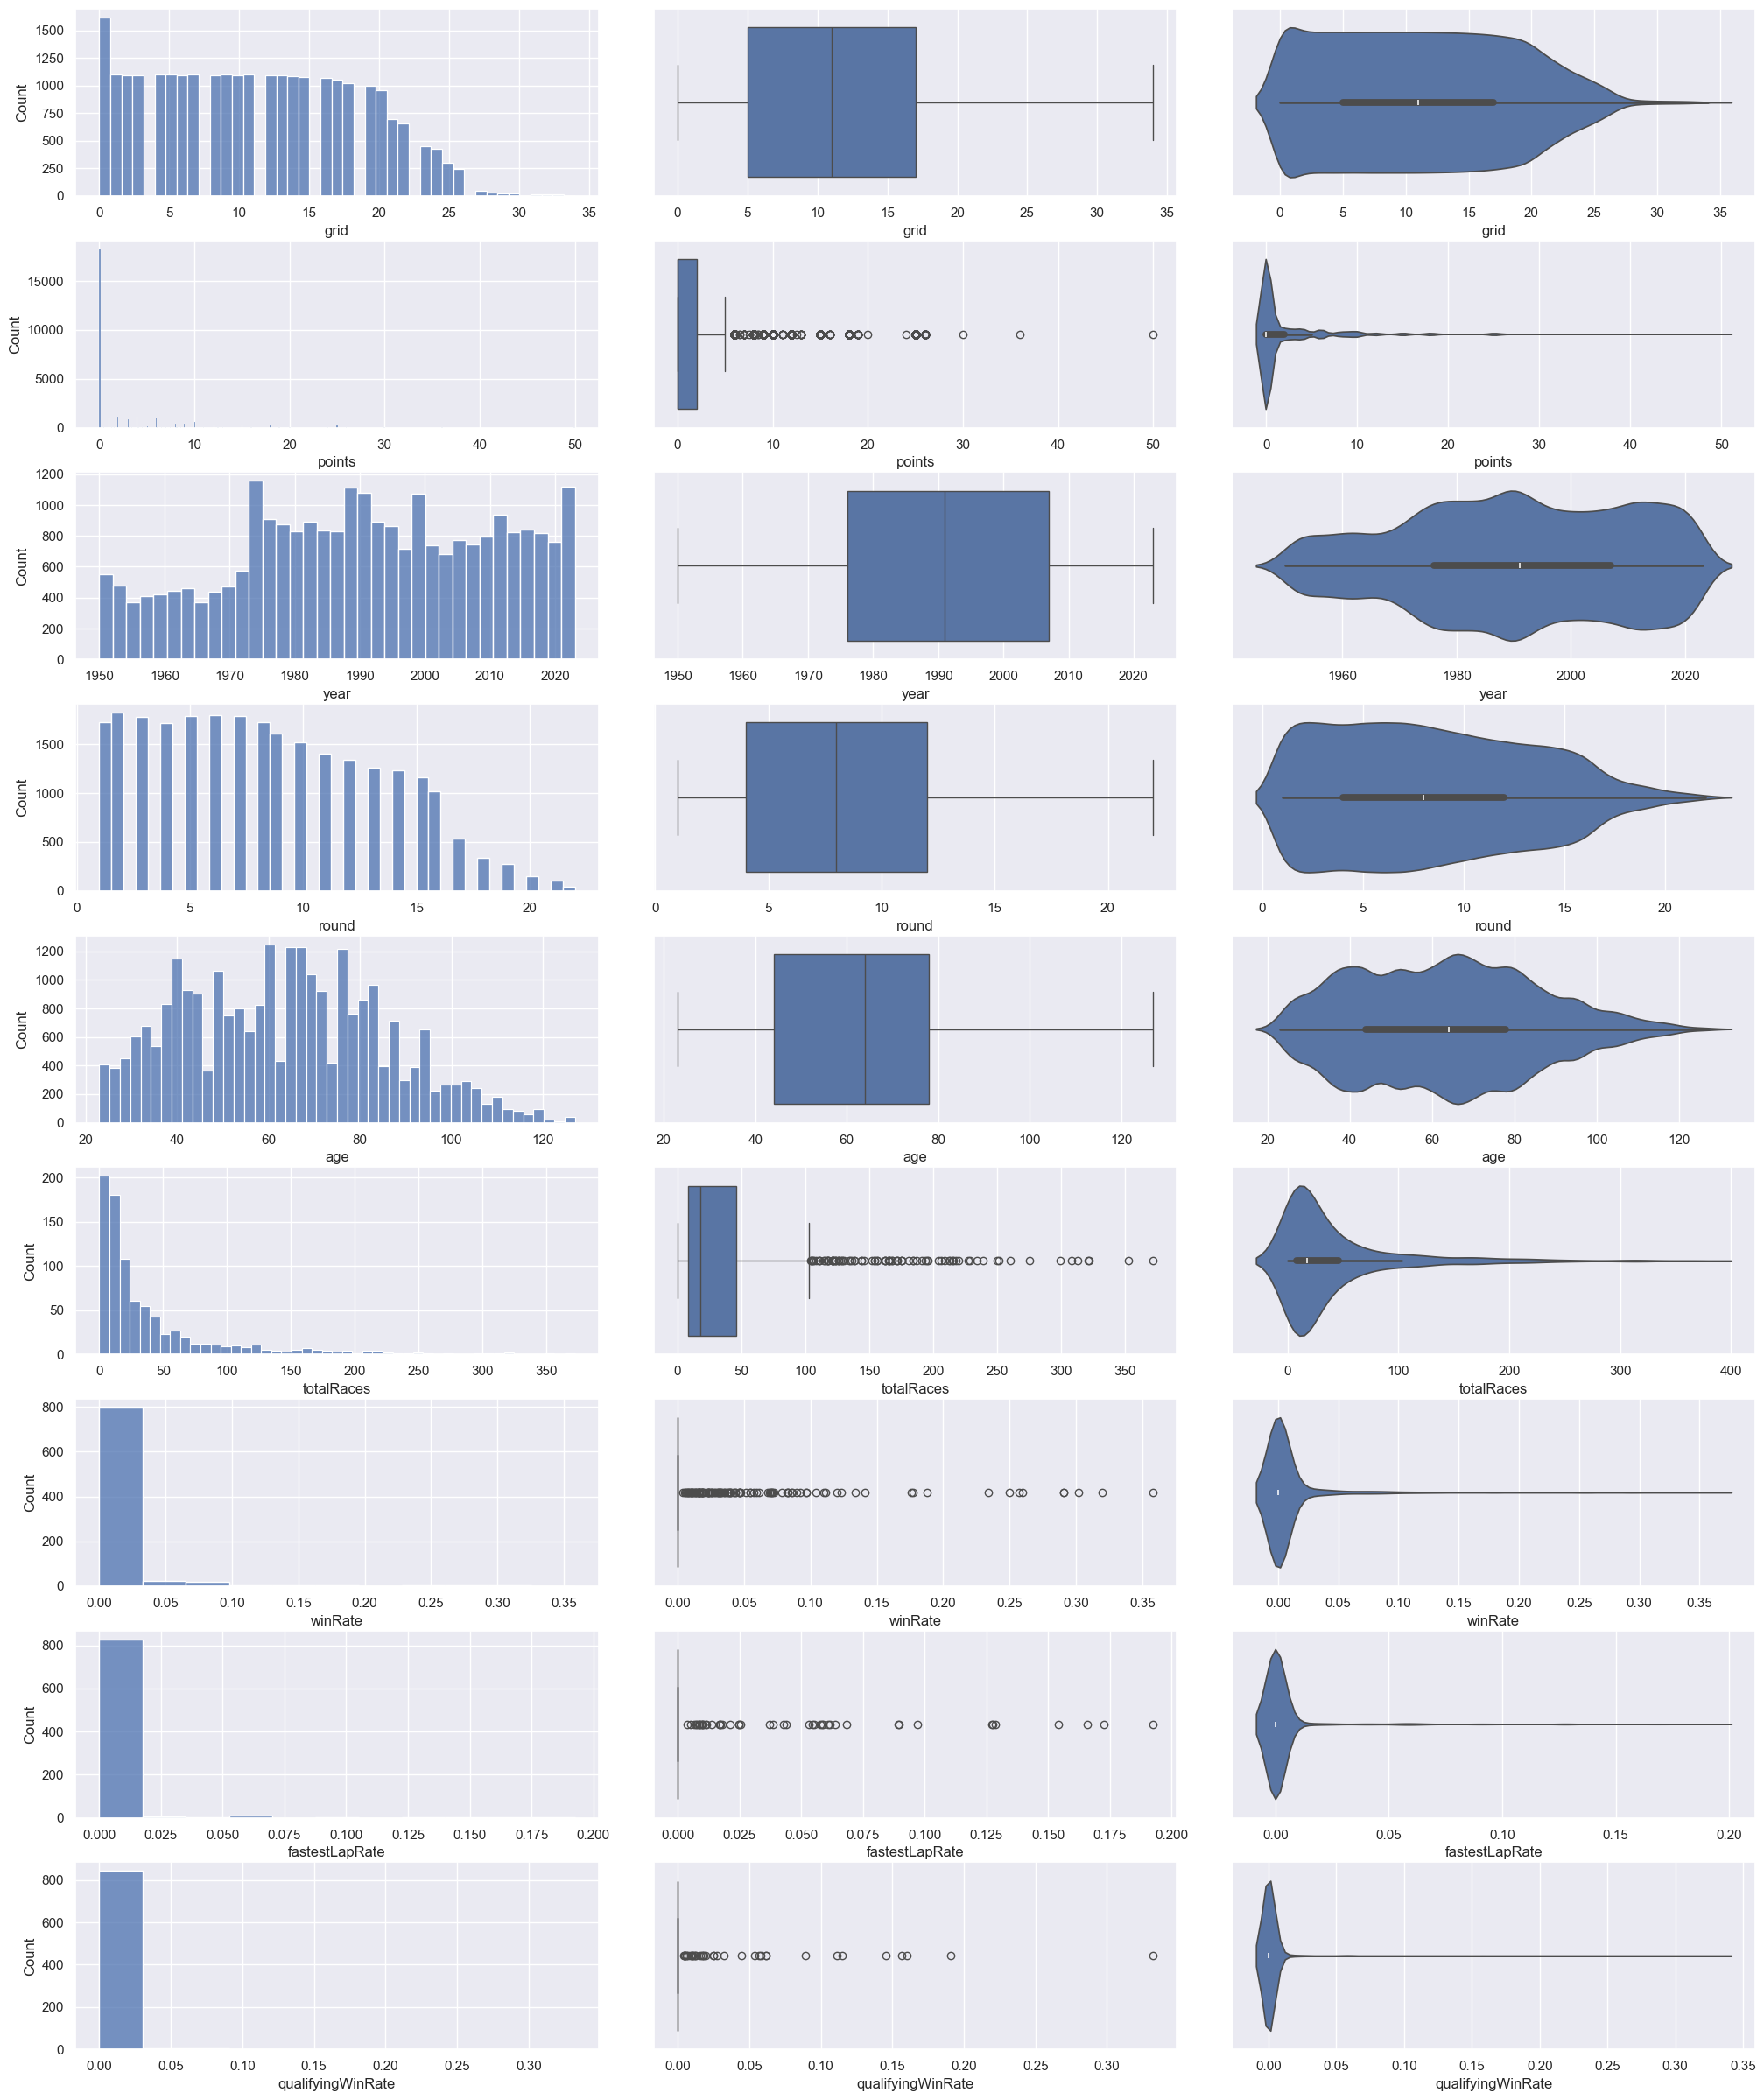

In [25]:
f, axes = plt.subplots(9, 3, figsize=(20, 24))
df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0
for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/lilianagocko/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


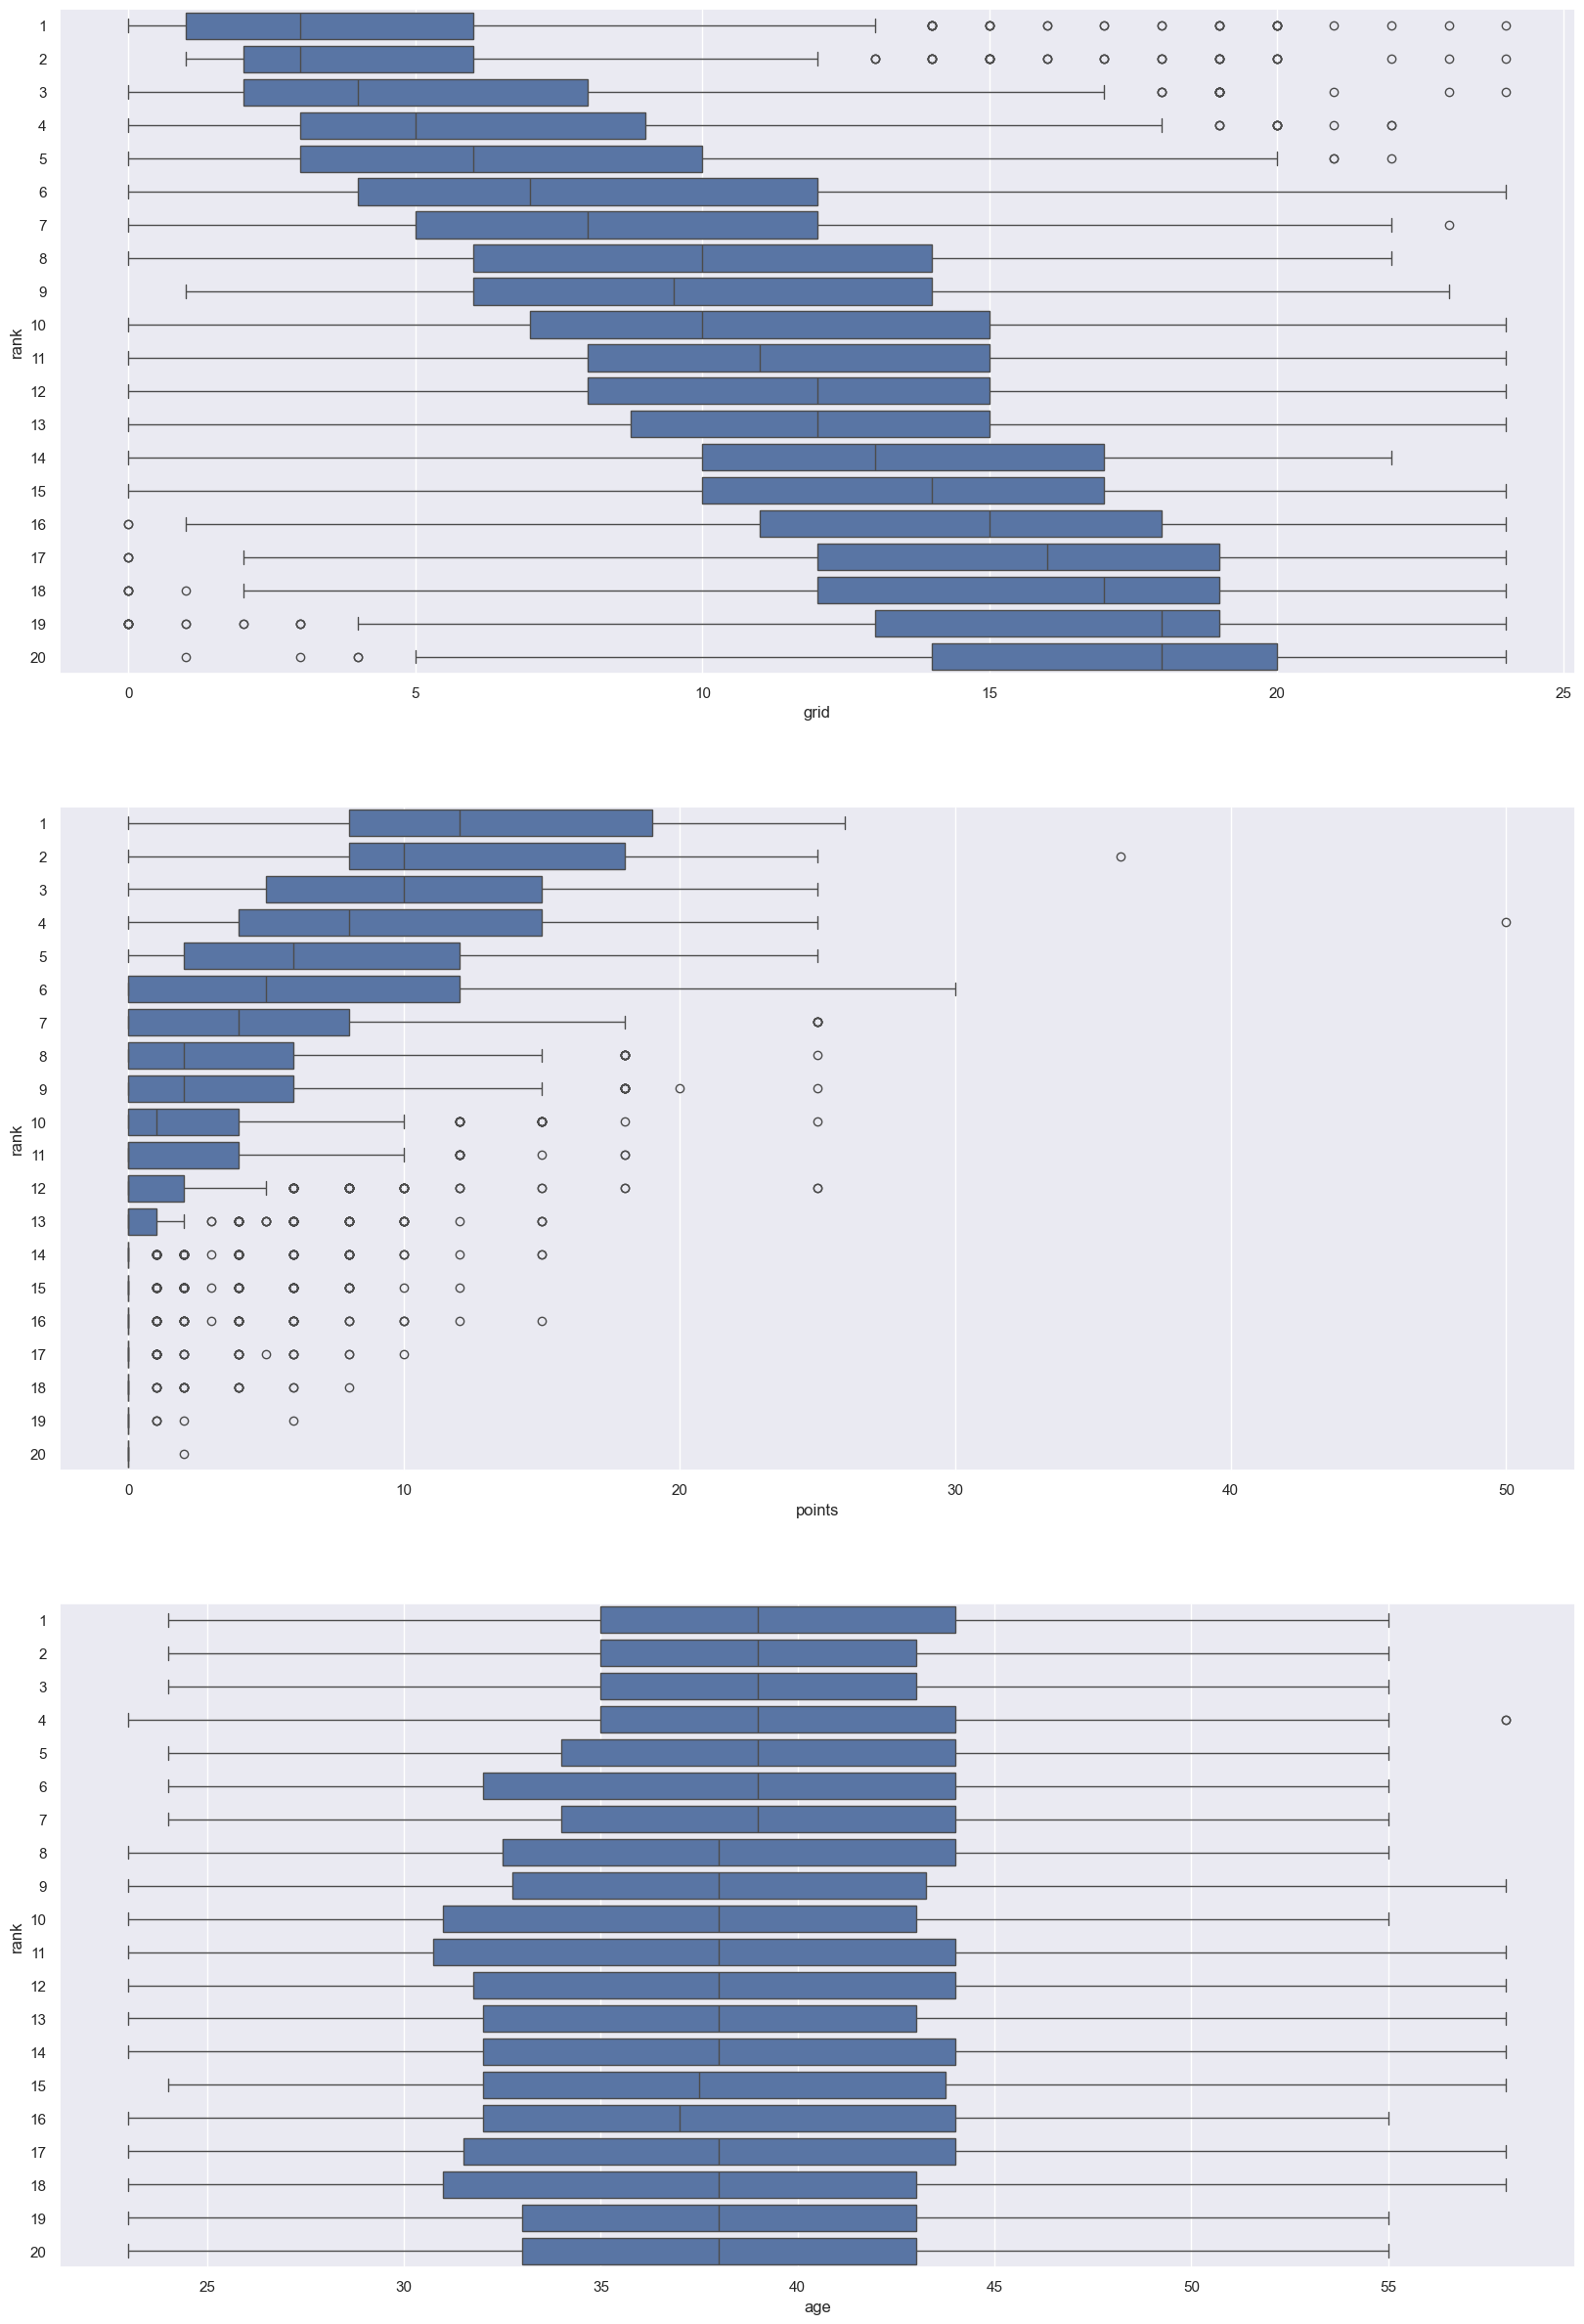

In [48]:
f, axes = plt.subplots(3, 1, figsize=(20, 30))
df_cat = pd.DataFrame(df_race[['grid', 'points', 'age', 'rank']])
count = 0
for col in df_cat:
    if col!='rank':
        sns.boxplot(data=df_race, x=col, y='rank', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20'], ax=axes[count])
        count = count + 1

In [29]:
df_race.describe()

,resultId,raceId,driverId,constructorId,grid,points,year,round,circuitId,date,dob,age
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080,26080,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,1.906635,1990.553144,8.368635,23.541488,1991-01-28 21:48:35.337423232,1961-01-24 14:21:34.233128832,63.215836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,1.000000,1950-05-13 00:00:00,1896-12-28 00:00:00,23.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,0.000000,1976.000000,4.000000,9.000000,1976-10-03 00:00:00,1945-11-12 00:00:00,44.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,0.000000,1991.000000,8.000000,18.000000,1991-04-10 12:00:00,1960-09-17 00:00:00,64.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,2.000000,2007.000000,12.000000,34.000000,2007-09-30 00:00:00,1979-10-17 00:00:00,78.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,50.000000,2023.000000,22.000000,79.000000,2023-07-30 00:00:00,2001-04-06 00:00:00,127.000000
std,7530.008377,303.034639,272.581622,60.221056,7.232797,4.219715,19.508665,4.949718,18.749739,NaN,NaN,21.894609


<Axes: >

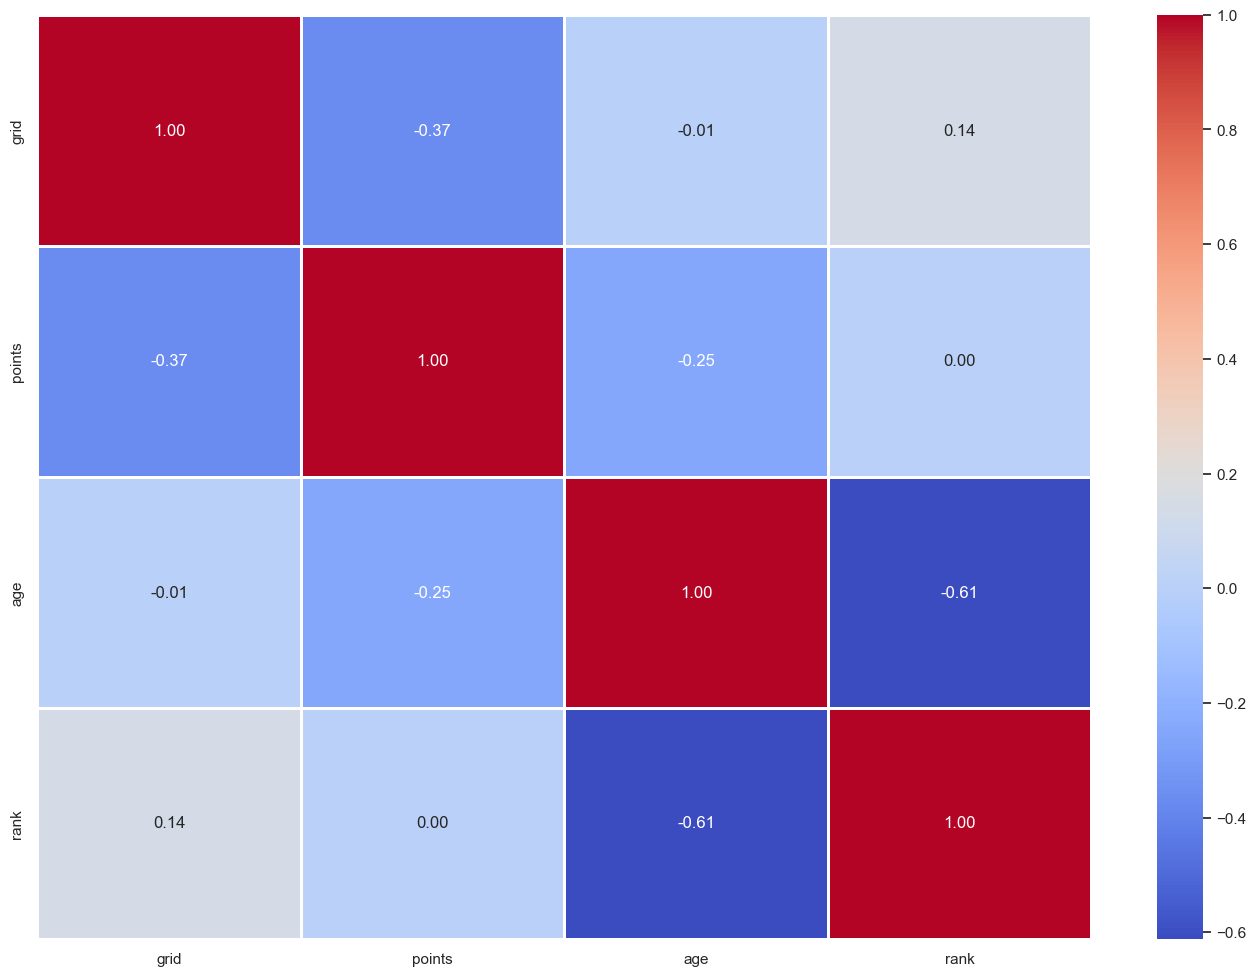

In [46]:
plt.figure(figsize=(17,12))
df_race.replace("\\N", "0", inplace=True)  
sns.heatmap(df_race[['grid', 'points', 'age', 'rank']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

In [1]:
%pip install fastf1 -q

Note: you may need to restart the kernel to use updated packages.


## More analysis using FastF1

In [2]:
import fastf1
session = fastf1.get_session(2019, 'Monza', 'Q')
session.load(telemetry=False, laps=False, weather=False)
vettel = session.get_driver('VET')
print(f"Pronto {vettel['FirstName']}?")

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /Users/lilianagocko/Library/Caches/fastf1
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fetching race control messages...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


Pronto Sebastian?


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Process

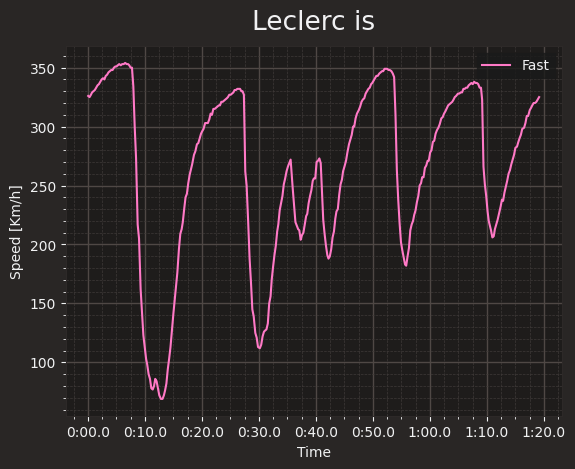

In [3]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [4]:
import fastf1
session = fastf1.get_session(2021, 7, 'Q')
session.name

'Qualifying'

In [5]:
session.date

Timestamp('2021-06-19 13:00:00')

In [8]:
session = fastf1.get_session(2021, 'French Grand Prix', 'Q')
session.load()
session.results

core           INFO 	Loading data for French Grand Prix - Qualifying [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,,NaN,0 days 00:01:31.001000,0 days 00:01:31.080000,0 days 00:01:29.990000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,2.0,,NaN,0 days 00:01:31.237000,0 days 00:01:30.788000,0 days 00:01:30.248000,NaT,,NaN
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,,3.0,,NaN,0 days 00:01:31.669000,0 days 00:01:30.735000,0 days 00:01:30.376000,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,0600EF,red_bull,Sergio,Perez,Sergio Perez,...,,4.0,,NaN,0 days 00:01:31.560000,0 days 00:01:30.971000,0 days 00:01:30.445000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,,5.0,,NaN,0 days 00:01:32.079000,0 days 00:01:31.146000,0 days 00:01:30.840000,NaT,,NaN
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,...,,6.0,,NaN,0 days 00:01:31.898000,0 days 00:01:31.353000,0 days 00:01:30.868000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,...,,7.0,,NaN,0 days 00:01:32.209000,0 days 00:01:31.567000,0 days 00:01:30.987000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,,8.0,,NaN,0 days 00:01:31.733000,0 days 00:01:31.542000,0 days 00:01:31.252000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Alpine,0090FF,alpine,Fernando,Alonso,Fernando Alonso,...,,9.0,,NaN,0 days 00:01:32.158000,0 days 00:01:31.549000,0 days 00:01:31.340000,NaT,,NaN
3,3,D RICCIARDO,RIC,ricciardo,McLaren,FF9800,mclaren,Daniel,Ricciardo,Daniel Ricciardo,...,,10.0,,NaN,0 days 00:01:32.181000,0 days 00:01:31.615000,0 days 00:01:31.382000,NaT,,NaN


In [9]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [10]:
session.results.iloc[0:10].loc[:, ['Abbreviation', 'Q3']]

,Abbreviation,Q3
33,VER,0 days 00:01:29.990000
44,HAM,0 days 00:01:30.248000
77,BOT,0 days 00:01:30.376000
11,PER,0 days 00:01:30.445000
55,SAI,0 days 00:01:30.840000
10,GAS,0 days 00:01:30.868000
16,LEC,0 days 00:01:30.987000
4,NOR,0 days 00:01:31.252000
14,ALO,0 days 00:01:31.340000
3,RIC,0 days 00:01:31.382000


In [11]:
fastest_lap = session.laps.pick_fastest()
fastest_lap['LapTime']

Timedelta('0 days 00:01:29.990000')

# Driver Laptimes Scatterplot

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [13]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

In [15]:
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

<Axes: xlabel='LapNumber', ylabel='LapTime'>

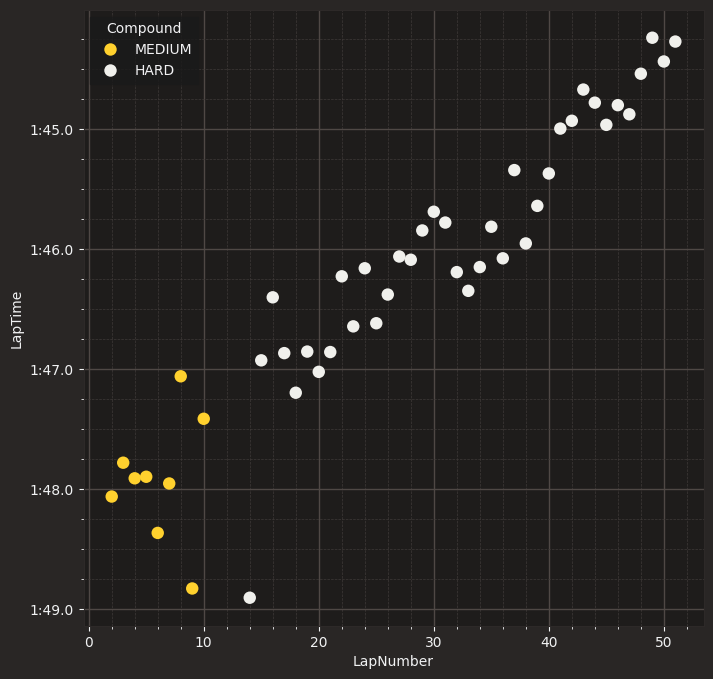

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')


Driver Laptimes Distribution Visualization

In [113]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [116]:
race = fastf1.get_session(2023, "Austria", 'R')
race.load()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [117]:
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['1', '16', '11', '4', '14', '55', '63', '44', '18', '10']


In [118]:
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['VER', 'LEC', 'PER', 'NOR', 'ALO', 'SAI', 'RUS', 'HAM', 'STR', 'GAS']


In [119]:
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'IWA': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97'}


<Axes: xlabel='Driver', ylabel='LapTime(s)'>

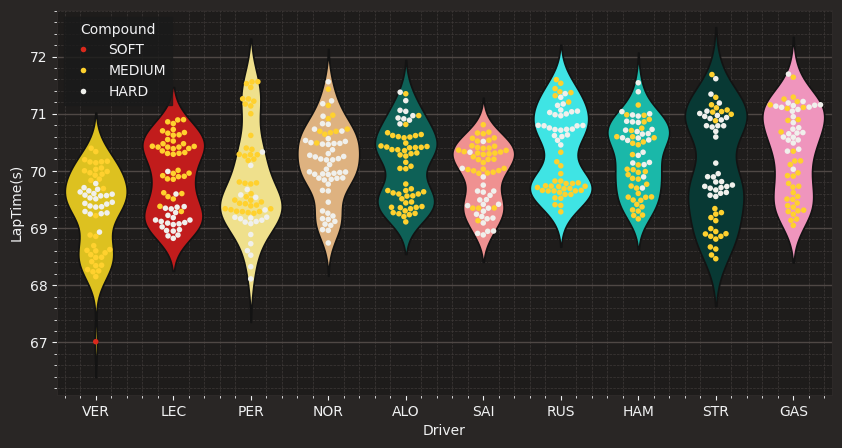

In [120]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

In [126]:
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import pandas as pd

fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

def gather_race_data(years, event_name, session_type='R'):
    all_driver_laps = []

    for year in years:
        race = fastf1.get_session(year, event_name, session_type)
        race.load()
        point_finishers = race.drivers[:10]
        driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
        driver_laps = driver_laps.reset_index()
        driver_laps["Year"] = year
        all_driver_laps.append(driver_laps)

    compiled_data = pd.concat(all_driver_laps, ignore_index=True)

    return compiled_data


In [127]:

years = list(range(2013, 2023)) 
event_name = "Austria"

compiled_data = gather_race_data(years, event_name)

driver_colors = {
    abv: fastf1.plotting.DRIVER_COLORS[driver]
    for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()
}

compiled_data["LapTime(s)"] = compiled_data["LapTime"].dt.total_seconds()

finishing_order = sorted(compiled_data["Driver"].unique())


fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(
    data=compiled_data,
    x="Driver",
    y="LapTime(s)",
    hue="Driver",
    inner=None,
    density_norm="area",
    order=finishing_order,
    palette=driver_colors,
)

sns.swarmplot(
    data=compiled_data,
    x="Driver",
    y="LapTime(s)",
    order=finishing_order,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    hue_order=["SOFT", "MEDIUM", "HARD"],
    linewidth=0,
    size=4,
)

plt.xlabel("Driver")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Distribution for the Last 10 Years in Austrian Grand Prix")
plt.show()


core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['7', '3', '1', '4', '10', '2', '15', '14', '5', '8', '6', '18', '12', '17', '22', '20', '23', '21', '19', '9', '16', '11']


DataNotLoadedError: The data you are trying to access has not been loaded yet. See `Session.load`

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...


req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '16', '77', '5', '44', '4', '10', '55', '7', '99', '11', '3', '27', '18', '23', '8', '26', '63', '20', '88']


['33', '16', '77', '5', '44', '4', '10', '55', '7', '99', '11', '3', '27', '18', '23']
['VER', 'LEC', 'BOT', 'VET', 'HAM', 'NOR', 'GAS', 'SAI', 'RAI', 'GIO', 'PER', 'RIC', 'HUL', 'STR', 'ALB']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core      

['77', '16', '4', '44', '55', '11', '10', '31', '99', '5', '6', '26', '23', '7', '63']
['BOT', 'LEC', 'NOR', 'HAM', 'SAI', 'PER', 'GAS', 'OCO', 'GIO', 'VET', 'LAT', 'KVY', 'ALB', 'RAI', 'RUS']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

core           INFO 	Loading data for Styrian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core      

['33', '44', '77', '11', '4', '55', '16', '18', '14', '22', '7', '5', '3', '31', '99']
['VER', 'HAM', 'BOT', 'PER', 'NOR', 'SAI', 'LEC', 'STR', 'ALO', 'TSU', 'RAI', 'VET', 'RIC', 'OCO', 'GIO']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seabor

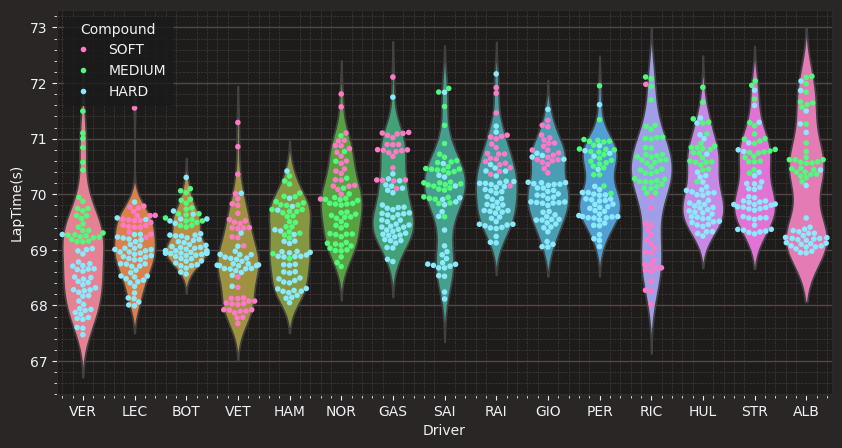

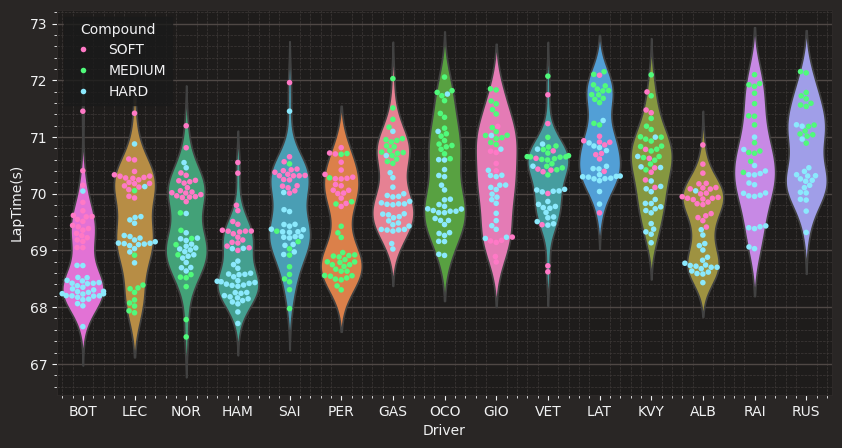

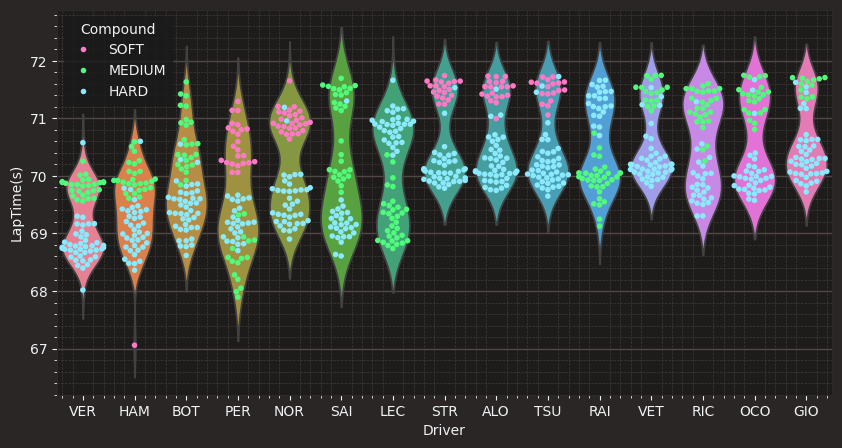

In [132]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)


drivers_to_discover = []
years= [2019, 2020, 2021]
for year in years:
    race = fastf1.get_session(year, "Austria", 'R')
    race.load()

    point_finishers = race.drivers[:15]
    print(point_finishers)
    if year == years[0]:
        drivers_to_discover = point_finishers
    else:
        drivers_to_discover = list(set(drivers_to_discover) & set(point_finishers))

    driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
    driver_laps = driver_laps.reset_index()

    finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
    print(finishing_order)

    # driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
    #                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
    # print(driver_colors)

    # create the figure
    fig, ax = plt.subplots(figsize=(10, 5))

    # Seaborn doesn't have proper timedelta support
    # so we have to convert timedelta to float (in seconds)
    driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

    sns.violinplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                hue="Driver",
                inner=None,
                density_norm="area",
                order=finishing_order,
                # palette=driver_colors
                )

    sns.swarmplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                order=finishing_order,
                hue="Compound",
                # palette=fastf1.plotting.COMPOUND_COLORS,
                hue_order=["SOFT", "MEDIUM", "HARD"],
                linewidth=0,
                size=4,
                )

# Gear shifts on track

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 

In [25]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [26]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

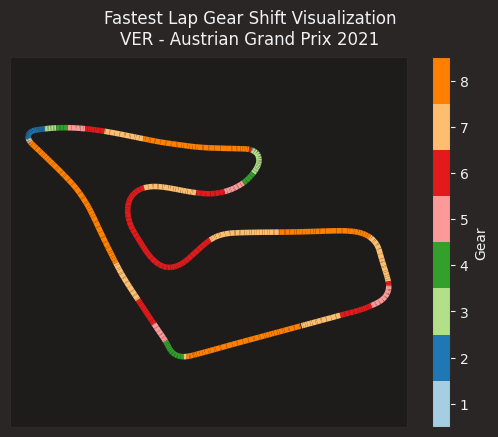

In [27]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()


Who can still win the drivers WDC?

In [34]:
import fastf1
from fastf1.ergast import Ergast

In [35]:
SEASON = 2023
ROUND = 15

In [36]:
def get_drivers_standings():
    ergast = Ergast()
    standings = ergast.get_driver_standings(season=SEASON, round=ROUND)
    return standings.content[0]

In [37]:
def calculate_max_points_for_remaining_season():
    POINTS_FOR_SPRINT = 8 + 25 + 1
    POINTS_FOR_CONVENTIONAL = 25 + 1  

    events = fastf1.events.get_event_schedule(SEASON, backend='ergast')
    events = events[events['RoundNumber'] > ROUND]
    sprint_events = len(events.loc[events["EventFormat"] == "sprint_shootout"])
    conventional_events = len(events.loc[events["EventFormat"] == "conventional"])
    sprint_points = sprint_events * POINTS_FOR_SPRINT
    conventional_points = conventional_events * POINTS_FOR_CONVENTIONAL

    return sprint_points + conventional_points

In [38]:
def calculate_who_can_win(driver_standings, max_points):
    LEADER_POINTS = int(driver_standings.loc[0]['points'])

    for i, _ in enumerate(driver_standings.iterrows()):
        driver = driver_standings.loc[i]
        driver_max_points = int(driver["points"]) + max_points
        can_win = 'No' if driver_max_points < LEADER_POINTS else 'Yes'

        print(f"{driver['position']}: {driver['givenName'] + ' ' + driver['familyName']}, "
              f"Current points: {driver['points']}, "
              f"Theoretical max points: {driver_max_points}, "
              f"Can win: {can_win}")

In [39]:
driver_standings = get_drivers_standings()
points = calculate_max_points_for_remaining_season()
calculate_who_can_win(driver_standings, points)

1: Max Verstappen, Current points: 374.0, Theoretical max points: 580, Can win: Yes
2: Sergio Pérez, Current points: 223.0, Theoretical max points: 429, Can win: Yes
3: Lewis Hamilton, Current points: 180.0, Theoretical max points: 386, Can win: Yes
4: Fernando Alonso, Current points: 170.0, Theoretical max points: 376, Can win: Yes
5: Carlos Sainz, Current points: 142.0, Theoretical max points: 348, Can win: No
6: Charles Leclerc, Current points: 123.0, Theoretical max points: 329, Can win: No
7: George Russell, Current points: 109.0, Theoretical max points: 315, Can win: No
8: Lando Norris, Current points: 97.0, Theoretical max points: 303, Can win: No
9: Lance Stroll, Current points: 47.0, Theoretical max points: 253, Can win: No
10: Pierre Gasly, Current points: 45.0, Theoretical max points: 251, Can win: No
11: Oscar Piastri, Current points: 42.0, Theoretical max points: 248, Can win: No
12: Esteban Ocon, Current points: 36.0, Theoretical max points: 242, Can win: No
13: Alexander

Speed visualization on track map

In [40]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [41]:
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma

In [42]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [43]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

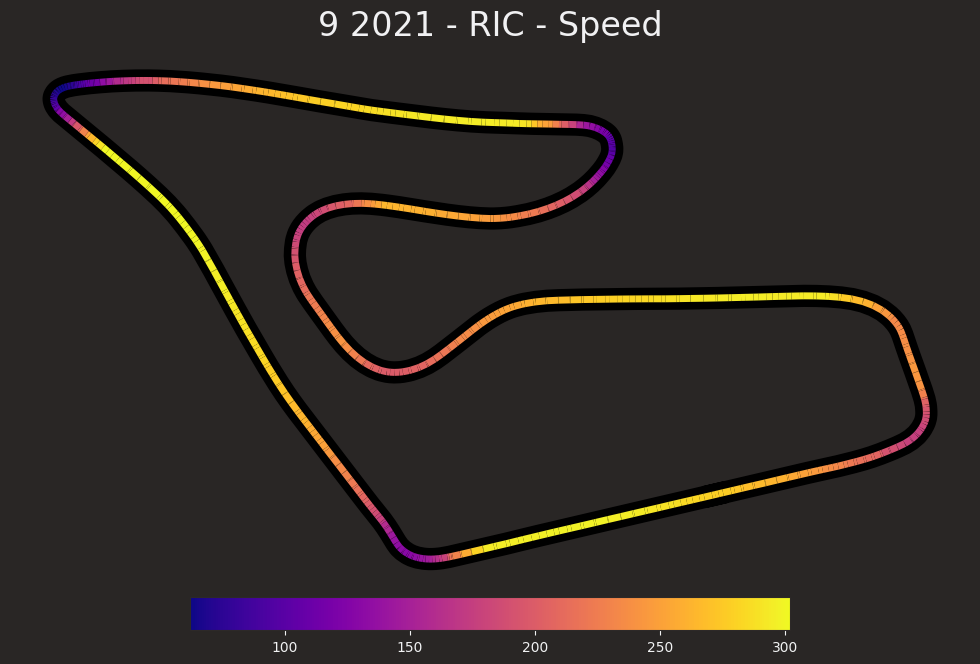

In [44]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

lc.set_array(color)
line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


plt.show()

Draw a track map with numbered corners

In [52]:
import matplotlib.pyplot as plt
import numpy as np

import fastf1

# year = 2021
# wknd = 9
# ses = 'R'
# driver = 'RIC'
# colormap = mpl.cm.plasma

session = fastf1.get_session(2021, 9, 'R')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '22', '18', '99', '7', '6', '5', '47', '9', '31']


In [53]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

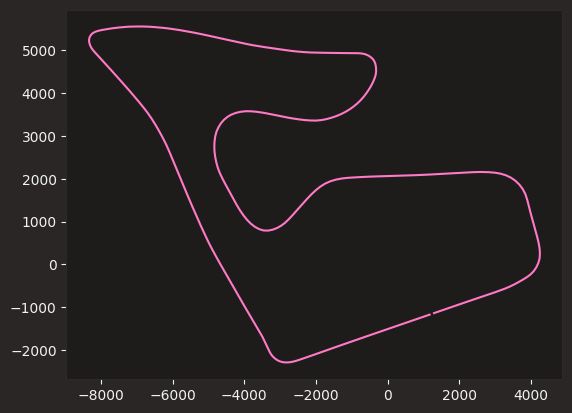

In [54]:

track = pos.loc[:, ('X', 'Y')].to_numpy()
track_angle = circuit_info.rotation / 180 * np.pi

rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

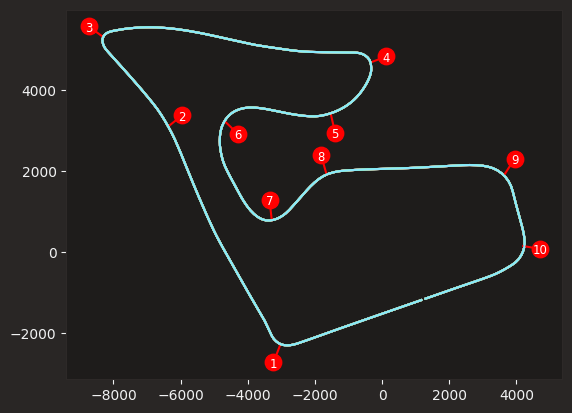

In [59]:
offset_vector = [500, 0] 
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    offset_angle = corner['Angle'] / 180 * np.pi

    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    plt.scatter(text_x, text_y, color='red', s=140)
    plt.plot([track_x, text_x], [track_y, text_y], color='red')
    plt.plot(rotated_track[:, 0], rotated_track[:, 1])
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')

In [61]:
import pandas as pd
import plotly.express as px
from plotly.io import show

from fastf1.ergast import Ergast

In [62]:
ergast = Ergast()
races = ergast.get_race_schedule(2022) 
results = []

for rnd, race in races['raceName'].items():
    temp = ergast.get_race_results(season=2022, round=rnd + 1)
    temp = temp.content[0]
    sprint = ergast.get_sprint_results(season=2022, round=rnd + 1)
    if sprint.content and sprint.description['round'][0] == rnd + 1:
        temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
        temp['points'] = temp['points_x'] + temp['points_y']
        temp.drop(columns=['points_x', 'points_y'], inplace=True)

    temp['round'] = rnd + 1
    temp['race'] = race.removesuffix(' Grand Prix')
    temp = temp[['round', 'race', 'driverCode', 'points']]  
    results.append(temp)

results = pd.concat(results)
races = results['race'].drop_duplicates()

In [63]:
results = results.pivot(index='driverCode', columns='round', values='points')
results['total_points'] = results.sum(axis=1)
results = results.sort_values(by='total_points', ascending=False)
results.drop(columns='total_points', inplace=True)
results.columns = races

In [64]:
fig = px.imshow(
    results,
    text_auto=True,
    aspect='auto', 
    color_continuous_scale=[[0,    'rgb(198, 219, 239)'], 
                            [0.25, 'rgb(107, 174, 214)'],
                            [0.5,  'rgb(33,  113, 181)'],
                            [0.75, 'rgb(8,   81,  156)'],
                            [1,    'rgb(8,   48,  107)']],
    labels={'x': 'Race',
            'y': 'Driver',
            'color': 'Points'}     
)
fig.update_xaxes(title_text='')      
fig.update_yaxes(title_text='')
fig.update_yaxes(tickmode='linear')  
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey',
                 showline=False,
                 tickson='boundaries')                 
fig
show(fig)

In [65]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [85]:

plotting.setup_mpl()

pd.options.mode.chained_assignment = None 

In [93]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']


In [87]:
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

In [94]:
laps_ric = race.laps.pick_driver("RIC")

In [95]:

laps_ver = race.laps.pick_driver("VER")

In [96]:

laps_ric = laps_ric.loc[laps_ric['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]

In [97]:
laps_ric['RaceLapNumber'] = laps_ric['LapNumber'] - 1
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1

In [98]:

full_distance_ver_ric = pd.DataFrame()
summarized_distance_ver_ric = pd.DataFrame()

In [99]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    
    if len(telemetry) != 0:
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)

        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_ric = summarized_distance_ver_ric.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)

In [100]:
summarized_distance_ver_ric

""


KeyError: 'Lap'

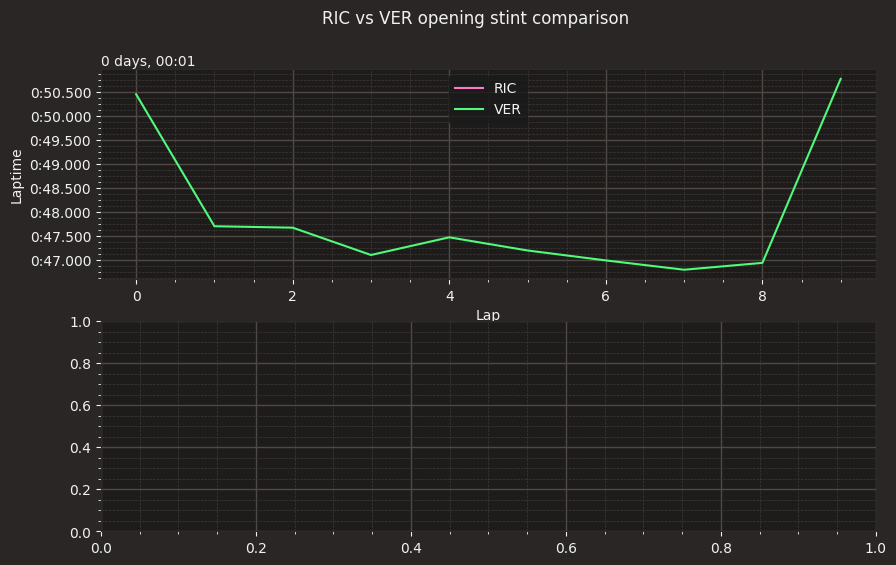

In [80]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("RIC vs VER opening stint comparison")

ax[0].plot(laps_ric['RaceLapNumber'], laps_ric['LapTime'], label='RIC')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")

ax[1].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Mean'], label='Mean', color='red')
ax[1].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Median'], label='Median', color='grey')
ax[1].set(ylabel='Distance (meters)', xlabel='Lap')
ax[1].legend(loc="upper center")

for a in ax.flat:
    a.label_outer()

plt.show()

In [101]:
lap_telemetry_ric = laps_ric.loc[laps_ric['RaceLapNumber']==4].get_car_data().add_distance()
lap_telemetry_ver = laps_ver.loc[laps_ver['RaceLapNumber']==4].get_car_data().add_distance()

distance_lap3 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==3]
distance_lap4 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==4]
distance_lap5 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==5]
distance_lap6 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==6]

ValueError: Cannot slice telemetry because self contains no driver number!

---

In [102]:
import pandas as pd
import numpy as np
import requests

# query API

races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(1950,2020)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
races = pd.DataFrame(races)

In [103]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [ ]:

rounds = []
for year in np.array(races_df['season'].unique()):
    rounds.append([year, list(races_df[races_df['season'] == year]['round'])])

query api version

In [107]:

results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)
    
    

In [109]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium


In [110]:
import pandas as pd
import numpy as np
import requests

# Initialize dictionary to store race data
races = {
    'season': [],
    'round': [],
    'circuit_id': [],
    'lat': [],
    'long': [],
    'country': [],
    'date': [],
    'url': []
}

# Fetch data for each year from 1950 to 2020
for year in list(range(1950, 2020)):
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json_data = r.json()  # Correct variable name

    # Extract data from each race
    for item in json_data['MRData']['RaceTable']['Races']:
        races['season'].append(int(item.get('season', None)))
        races['round'].append(int(item.get('round', None)))
        races['circuit_id'].append(item['Circuit'].get('circuitId', None))
        races['lat'].append(float(item['Circuit']['Location'].get('lat', None)))
        races['long'].append(float(item['Circuit']['Location'].get('long', None)))
        races['country'].append(item['Circuit']['Location'].get('country', None))
        races['date'].append(item.get('date', None))
        races['url'].append(item.get('url', None))

# Create DataFrame
races_df = pd.DataFrame(races)

# Create a list of rounds for each season
rounds = []
for year in np.array(races_df['season'].unique()):
    rounds.append([year, list(races_df[races_df['season'] == year]['round'])])


In [112]:
import requests
import pandas as pd

# Initialize the dictionary to store race results data
results = {
    'season': [],
    'round': [],
    'circuit_id': [],
    'driver': [],
    'date_of_birth': [],
    'nationality': [],
    'constructor': [],
    'grid': [],
    'time': [],
    'status': [],
    'points': [],
    'podium': []
}

# Fetch data for each season and round
for season_round in rounds:
    season = season_round[0]
    rounds_list = season_round[1]
    
    for rnd in rounds_list:
        url = f'http://ergast.com/api/f1/{season}/{rnd}/results.json'
        response = requests.get(url)
        json_data = response.json()  # Correct variable name
        
        race_data = json_data['MRData']['RaceTable']['Races'][0]
        
        # Extract data for each driver in the race results
        for result in race_data['Results']:
            results['season'].append(int(race_data.get('season', None)))
            results['round'].append(int(race_data.get('round', None)))
            results['circuit_id'].append(race_data['Circuit'].get('circuitId', None))
            results['driver'].append(result['Driver'].get('driverId', None))
            results['date_of_birth'].append(result['Driver'].get('dateOfBirth', None))
            results['nationality'].append(result['Driver'].get('nationality', None))
            results['constructor'].append(result['Constructor'].get('constructorId', None))
            results['grid'].append(int(result.get('grid', None)))
            # results['time'].append(result['Time'].get('millis', None))
            results['status'].append(result.get('status', None))
            results['points'].append(int(result.get('points', 0)))
            results['podium'].append(int(result.get('position', 0)))

# Create a DataFrame
results_df = pd.DataFrame(results)


ValueError: invalid literal for int() with base 10: '8.5'

In [122]:
import fastf1 as f1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [123]:

years = [2018, 2019, 2020, 2021, 2022]
austrian_gp_data = []

for year in years:
    grand_prix = f1.get_session(year, 'Austria', 'R')  
    grand_prix.load()  
    
    laps = grand_prix.laps
    results = grand_prix.results
    
    laps['Year'] = year
    results['Year'] = year
    
    austrian_gp_data.append((laps, results))


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...


req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data

In [ ]:

all_laps = pd.concat([data[0] for data in austrian_gp_data], ignore_index=True)
all_results = pd.concat([data[1] for data in austrian_gp_data], ignore_index=True)

pit_stops = all_laps.pick_pit_stops()
pit_stops['Driver'] = pit_stops['Driver'].map(lambda d: d['familyName'])

driver_pit_stops = pit_stops.groupby(['Year', 'Driver'])['Lap'].count().reset_index()
driver_pit_stops.rename(columns={'Lap': 'PitStops'}, inplace=True)

data = pd.merge(all_results, driver_pit_stops, on=['Year', 'Driver'], how='left')

data['PitStops'].fillna(0, inplace=True)


In [125]:
import fastf1 as f1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get data for the last 5 years for the Austrian Grand Prix
years = [2018, 2019, 2020, 2021, 2022]
austrian_gp_data2 = []

for year in years:
    grand_prix = f1.get_session(year, 'Austria', 'R') 
    grand_prix.load() 
    
    laps = grand_prix.laps
    results = grand_prix.results
    pit_stops = laps[laps['PitInTime'].notna()]  # Laps with non-null pit-in times
    pit_stops['Driver'] = pit_stops['Driver'].apply(lambda d: d['familyName'])
    pit_stops_data = pit_stops[['Lap', 'Driver', 'PitInTime', 'PitOutTime']]
    
    pit_stops_data['Year'] = year
    pit_stops_data['Race'] = 'Austria'
    
    austrian_gp_data2.append(pit_stops_data)


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '7', '5', '8', '20', '31', '11', '14', '16', '9', '10', '55', '35', '18', '2', '44', '28', '3', '77', '27']


TypeError: string indices must be integers

In [ ]:
features = ['Year', 'ConstructorId', 'Grid']
target = 'PitStops'


X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

linear_reg_mse = mean_squared_error(y_test, linear_reg.predict(X_test))
random_forest_mse = mean_squared_error(y_test, random_forest.predict(X_test))


In [ ]:

next_year_data = data[data['Year'] == 2022].copy()
next_year_data['Year'] = 2023

linear_reg_predictions = linear_reg.predict(next_year_data[features])
random_forest_predictions = random_forest.predict(next_year_data[features])

plt.figure(figsize=(10, 6))
sns.histplot(linear_reg_predictions, kde=True, label='Linear Regression')
sns.histplot(random_forest_predictions, kde=True, label='Random Forest')
plt.xlabel('Predicted Pit Stops')
plt.ylabel('Frequency')
plt.title('Predicted Distribution of Pit Stops for 2023')
plt.legend()
plt.show()
